# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url ='http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []
#i put my api_key here as I struggeld a bit with the import portion but this worked well for me.. that being said, I removed it before submitting
api_key = #YOUR API KEY HERE
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f'{url}q={city}&appid={api_key}')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vernon
Processing Record 2 of Set 1 | iskateley
Processing Record 3 of Set 1 | portland
Processing Record 4 of Set 1 | koulamoutou
Processing Record 5 of Set 1 | ushtobe
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | marsaskala
City not found. Skipping...
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | mount pearl
Processing Record 11 of Set 1 | trinidad
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | rio grande
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | krasnyy chikoy
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | nova vicosa
Processing Recor

Processing Record 41 of Set 4 | khanty-mansiysk
Processing Record 42 of Set 4 | trincomalee
Processing Record 43 of Set 4 | selfoss
Processing Record 44 of Set 4 | changqing
Processing Record 45 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | charlottetown
Processing Record 48 of Set 4 | tutoia
Processing Record 49 of Set 4 | waddan
Processing Record 0 of Set 5 | sinop
Processing Record 1 of Set 5 | dabou
Processing Record 2 of Set 5 | srikakulam
Processing Record 3 of Set 5 | igarka
Processing Record 4 of Set 5 | keflavik
Processing Record 5 of Set 5 | broken hill
Processing Record 6 of Set 5 | atafu village
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | amga
Processing Record 9 of Set 5 | yanam
Processing Record 10 of Set 5 | ha giang
Processing Record 11 of Set 5 | souillac
Processing Record 12 of Set 5 | liuduzhai
Processing Record 13 of Set 5 | badger
Processing Record 14 of Set

Processing Record 31 of Set 8 | zaranj
Processing Record 32 of Set 8 | chimoio
Processing Record 33 of Set 8 | opuwo
Processing Record 34 of Set 8 | leer
Processing Record 35 of Set 8 | kamaishi
Processing Record 36 of Set 8 | padang
Processing Record 37 of Set 8 | kununurra
Processing Record 38 of Set 8 | klaksvik
Processing Record 39 of Set 8 | maumere
Processing Record 40 of Set 8 | gediz
Processing Record 41 of Set 8 | bikenibeu village
Processing Record 42 of Set 8 | hobyo
Processing Record 43 of Set 8 | tipasa
Processing Record 44 of Set 8 | los altos
Processing Record 45 of Set 8 | wynyard
Processing Record 46 of Set 8 | villa emilio carranza
Processing Record 47 of Set 8 | sagae
Processing Record 48 of Set 8 | chibougamau
Processing Record 49 of Set 8 | maun
Processing Record 0 of Set 9 | woolgoolga
Processing Record 1 of Set 9 | iwanai
Processing Record 2 of Set 9 | o'fallon
Processing Record 3 of Set 9 | soanierana ivongo
Processing Record 4 of Set 9 | isangel
Processing Reco

Processing Record 24 of Set 12 | maymana
Processing Record 25 of Set 12 | cill airne
Processing Record 26 of Set 12 | aykhal
Processing Record 27 of Set 12 | gaoping
Processing Record 28 of Set 12 | karratha
Processing Record 29 of Set 12 | barra de santo antonio
Processing Record 30 of Set 12 | beira
Processing Record 31 of Set 12 | mohr
Processing Record 32 of Set 12 | lubango
Processing Record 33 of Set 12 | saint-joseph
Processing Record 34 of Set 12 | fuerte olimpo
Processing Record 35 of Set 12 | the pas
Processing Record 36 of Set 12 | danilovka
Processing Record 37 of Set 12 | la libertad
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vernon,50.2581,-119.2691,279.68,88,98,1.03,CA,1701982671
1,iskateley,67.6803,53.1512,258.72,96,100,3.58,RU,1701982863
2,portland,45.5234,-122.6762,282.50,93,100,8.75,US,1701982426
3,koulamoutou,-1.1303,12.4736,295.88,99,100,1.00,GA,1701982864
4,ushtobe,45.2514,77.9838,270.95,54,100,4.30,KZ,1701982866


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vernon,50.2581,-119.2691,279.68,88,98,1.03,CA,1701982671
1,iskateley,67.6803,53.1512,258.72,96,100,3.58,RU,1701982863
2,portland,45.5234,-122.6762,282.50,93,100,8.75,US,1701982426
3,koulamoutou,-1.1303,12.4736,295.88,99,100,1.00,GA,1701982864
4,ushtobe,45.2514,77.9838,270.95,54,100,4.30,KZ,1701982866


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

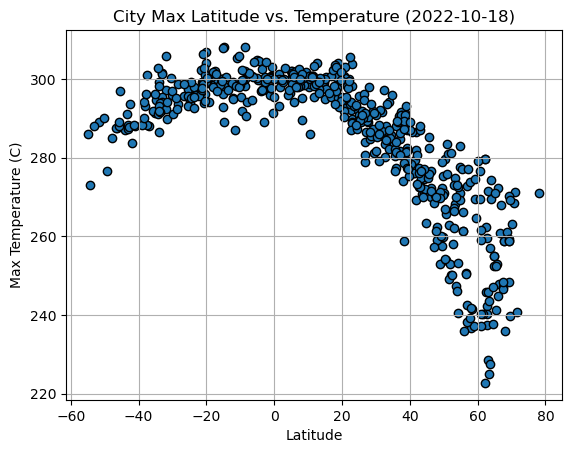

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')


# Incorporate the other graph properties
#not sure why, but my max temp values are really wrong ...
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

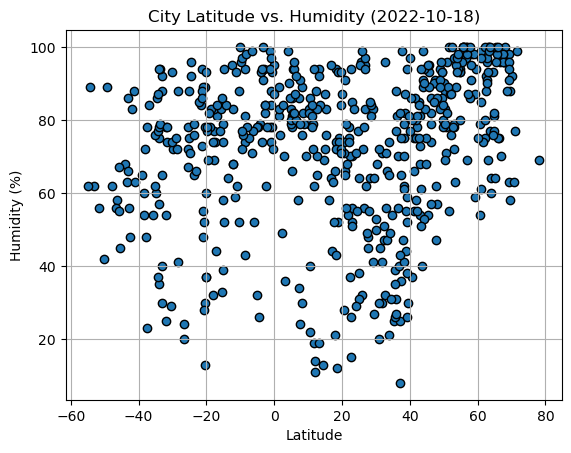

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')


# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

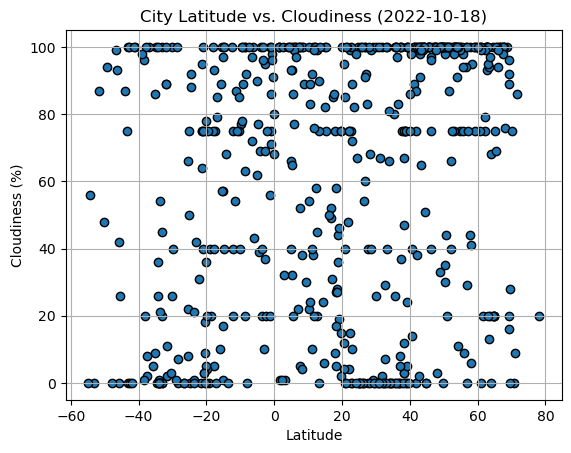

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

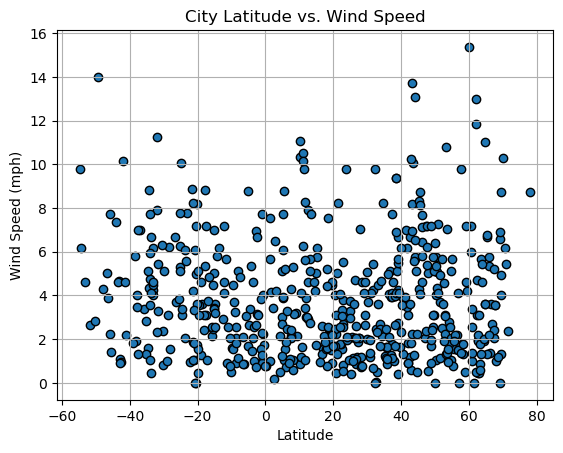

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    reg_line = x_values * slope + intercept
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    #the regular scatter graphs
    plt.scatter(x_values, y_values, edgecolors='black', alpha=0.75)
    #the regression line pasted on top of it
    plt.plot(x_values, reg_line, 'r', label='y = {:.2f}x + {:.2f}'.format(slope, intercept))
    #allows it to display the equation on the graph like shown
    plt.annotate(line_eq, text_coordinates, fontsize=12, color='red', ha='left')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    print(f'The r-squared is: {rvalue**2}')
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vernon,50.2581,-119.2691,279.68,88,98,1.03,CA,1701982671
1,iskateley,67.6803,53.1512,258.72,96,100,3.58,RU,1701982863
2,portland,45.5234,-122.6762,282.50,93,100,8.75,US,1701982426
4,ushtobe,45.2514,77.9838,270.95,54,100,4.30,KZ,1701982866
8,mount pearl,47.5166,-52.7813,270.45,91,100,7.20,CA,1701982869


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,koulamoutou,-1.1303,12.4736,295.88,99,100,1.00,GA,1701982864
5,port-aux-francais,-49.3500,70.2167,276.54,89,94,13.98,TF,1701982866
6,adamstown,-25.0660,-130.1015,296.01,75,50,5.29,PN,1701982868
7,waitangi,-43.9535,-176.5597,286.94,68,87,7.38,NZ,1701982869
9,trinidad,-14.8333,-64.9000,308.14,52,40,3.60,BO,1701982869


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7388663676657737


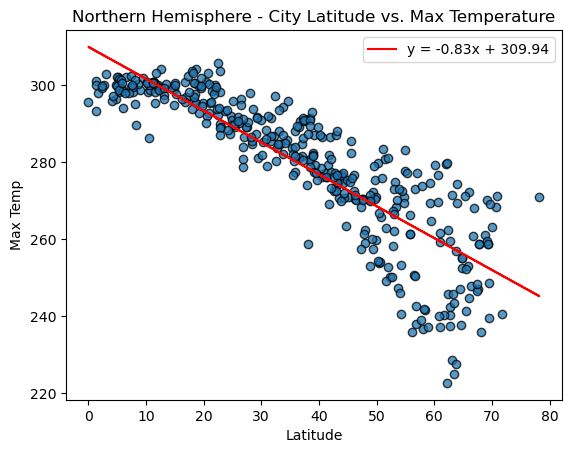

In [41]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', 'Northern Hemisphere - City Latitude vs. Max Temperature', (0, 0))

The r-squared is: 0.39726627616935833


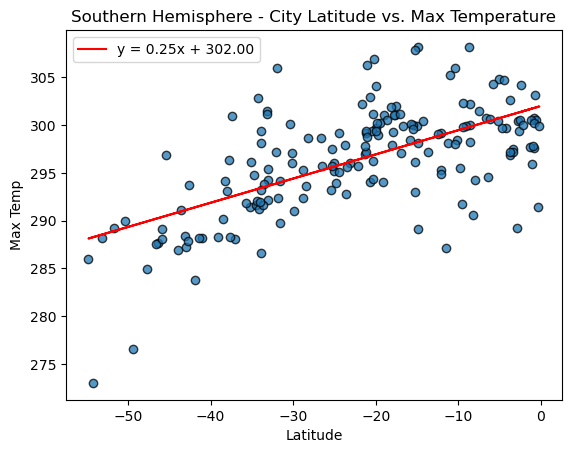

In [42]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', 'Southern Hemisphere - City Latitude vs. Max Temperature', (0, 0))

**Discussion about the linear relationship:** Makes sense how the closer you are to the equator the max temperatures seem to rise. These charts are showing the relationship between the two hemispheres. It appears that the northern hemisphere has a faster decline in temperatures whereas the south hemisphere seems to drain the temperature more slowly the further you get from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.09345249708003585


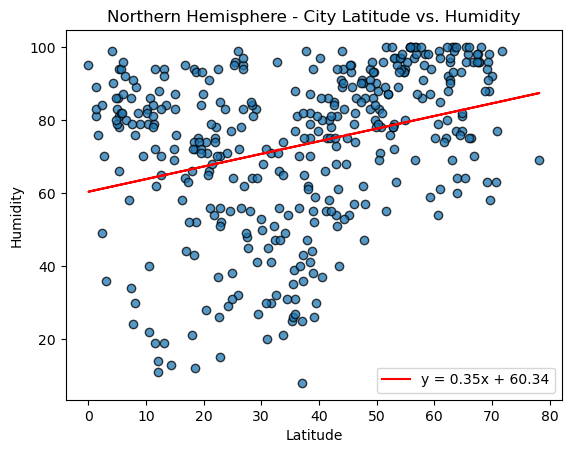

In [46]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Northern Hemisphere - City Latitude vs. Humidity', (0, 0))

The r-squared is: 0.075607311825707


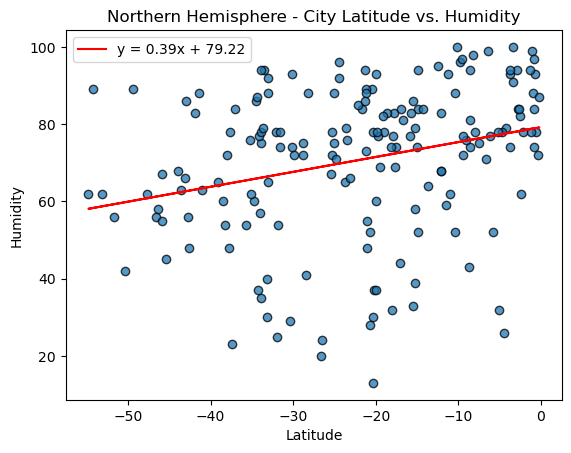

In [44]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Southern Hemisphere - City Latitude vs. Humidity', (0, 0))

**Discussion about the linear relationship:** Here it appears that the north hemisphere gains humidity as it moves away from the equator while the south equator seems to lose humidity the farther away it goes. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.024571130163250812


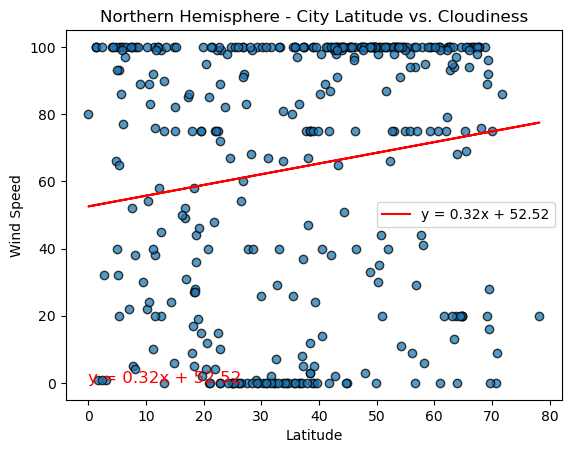

In [51]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Wind Speed', 'Northern Hemisphere - City Latitude vs. Cloudiness', (0, 0))

The r-squared is: 0.05811173342533841


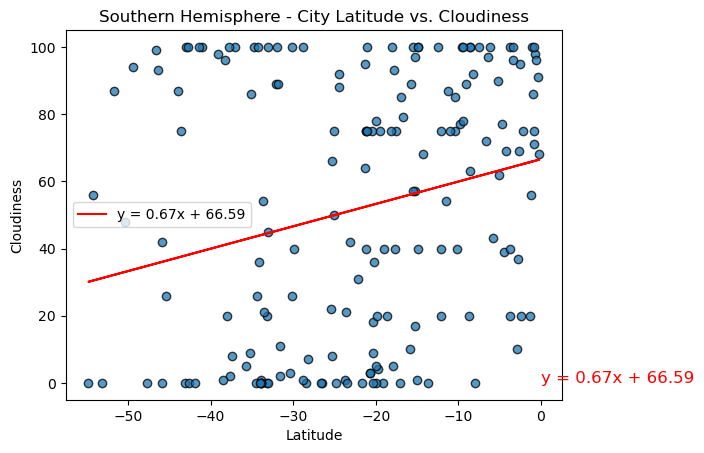

In [50]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Southern Hemisphere - City Latitude vs. Cloudiness', (0, 0))

**Discussion about the linear relationship:** Again, the colder north which has more humidity will not surprisingly display more clouds as well. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0053875373049323836


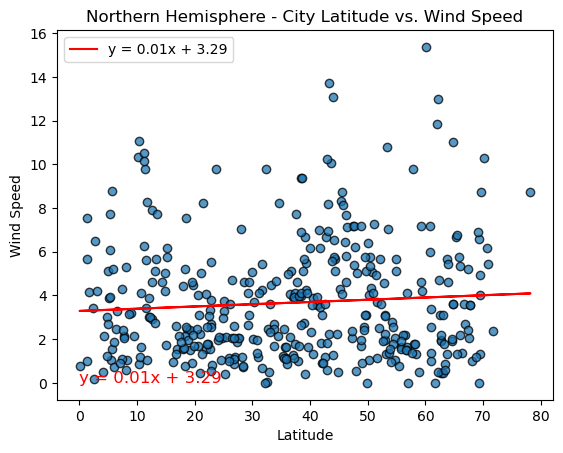

In [52]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Northern Hemisphere - City Latitude vs. Wind Speed', (0, 0))

The r-squared is: 0.06885530570243116


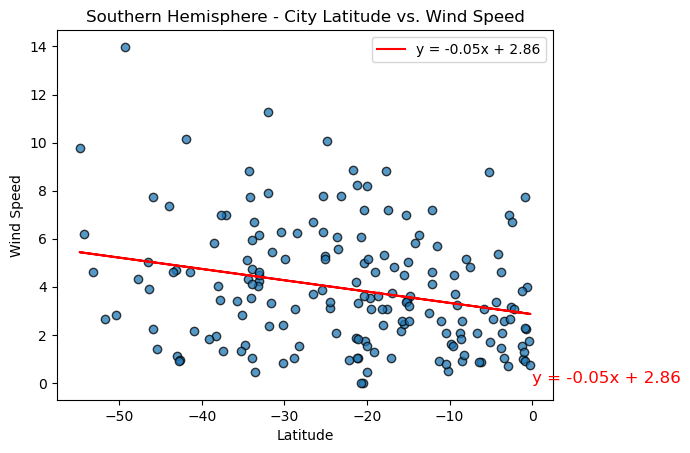

In [53]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Southern Hemisphere - City Latitude vs. Wind Speed', (0, 0))

**Discussion about the linear relationship:** Winds seem pretty similar between the hemispheres, though the southern hemisphere seems to have slightly stronger winds the further away from the equator they get. 